In [345]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [346]:
# load package for loading data
import pandas as pd

In [347]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [348]:
housing_dataset = pd.read_csv('/content/drive/MyDrive/boston_housing.csv')
housing_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [349]:
X = housing_dataset[['RM']].values
y = housing_dataset['MEDV'].values

In [350]:
# load package for spliting data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data Visualization

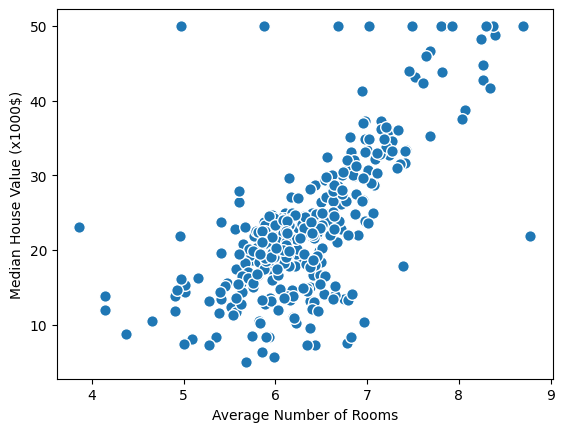

In [352]:
# visualize data
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
# plt.xlabel('...')
# plt.ylabel('...')
plt.show()

### Linear Regression (Base)

### Gradient Descent

In [353]:
class GradientDescent:
    def __init__(self, eta=0.01, max_iter=200, random_state=42):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.costs = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance
        self.w = np.random.randn(X_b.shape[1], 1)  # random initialization

        for iteration in range(self.max_iter):
            gradients = 2/m * X_b.T.dot(X_b.dot(self.w) - y.reshape(-1,1))
            self.w = self.w - self.eta * gradients
            cost = np.mean((X_b.dot(self.w) - y.reshape(-1,1))**2)
            self.costs.append(cost)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.w)

- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

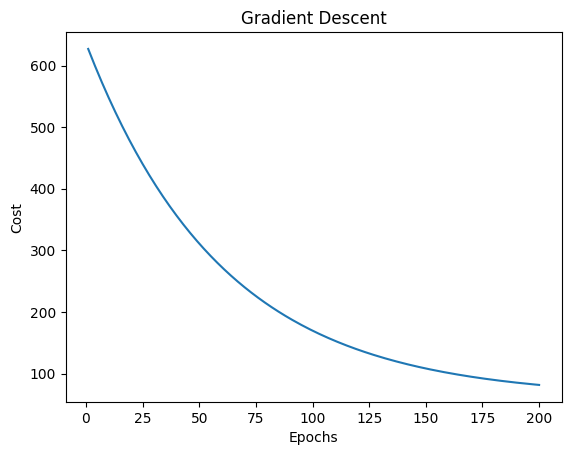

In [354]:
# Initialize the model
reg_GD = GradientDescent(eta=1e-4)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data

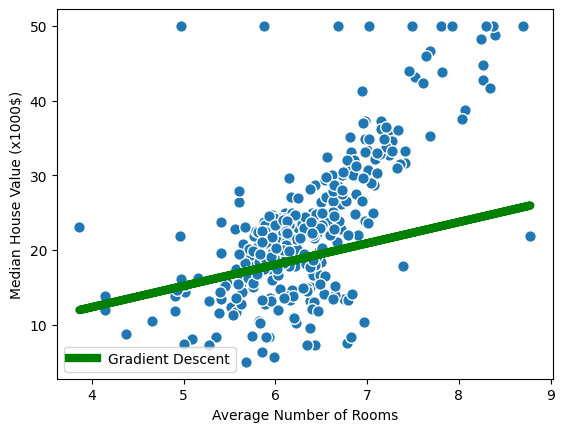

In [355]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [356]:
from sklearn.linear_model import SGDRegressor, LinearRegression

- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [357]:
# Initialize the model
reg_SGD = SGDRegressor(eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')

# Train model
reg_SGD.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=200,
             random_state=42)

Visualize the prediction of Stochastic Gradient Descent model on Training Data

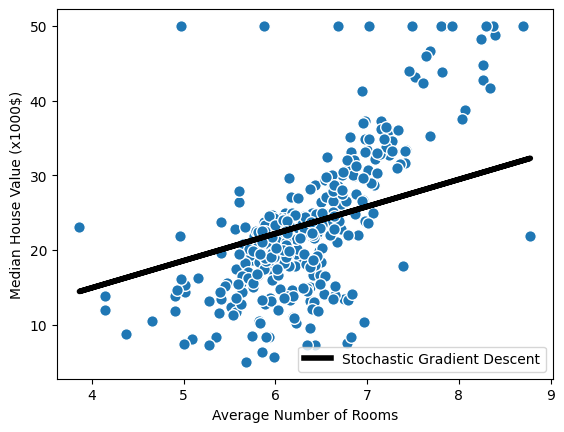

In [358]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [359]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

Visualize the prediction of Normal Equation model on Training Data

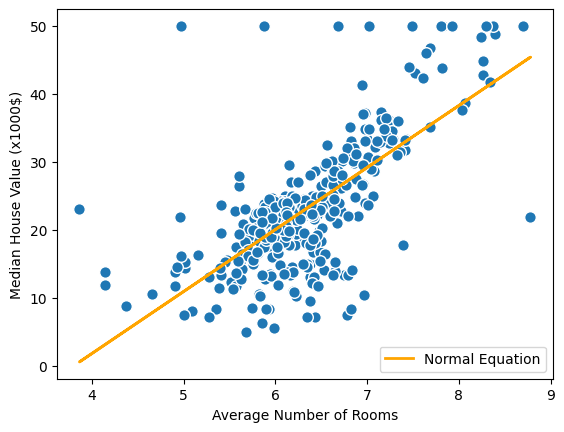

In [360]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

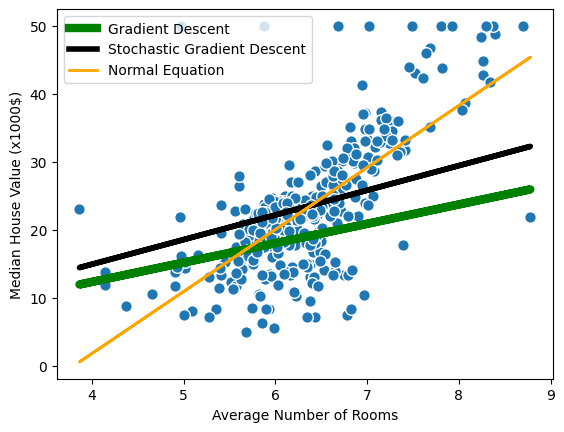

In [361]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [362]:
w_GD = reg_GD.w
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
print(w_GD)
print(w_SGD)
print(w_NE)

[[0.94478027]
 [2.84819648]]
[0.42267533 3.62760358]
[-34.66230744   9.1181022 ]


Performance Comparisons (on Testing Set)

In [363]:
y_pred_GD = reg_GD.predict(X_test)

In [364]:
y_pred_SGD = reg_SGD.predict(X_test)

In [365]:
y_pred_NE = reg_NE.predict(X_test)

In [366]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [367]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 5.68872
MAE of SGD: 5.387474
MAE of NE: 4.314224


In [368]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 64.236664
MSE of SGD: 54.538412
MSE of NE: 40.35145


In [369]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.137914
R2 of SGD: 0.268069
R2 of NE: 0.458465


## Experiment with Standardized Data

In [370]:
# Re-load the dataset
housing_dataset = pd.read_csv('/content/drive/MyDrive/boston_housing.csv')

In [371]:
# load the package for standardizing data (Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [372]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [373]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = scaler.fit_transform(housing_dataset[['RM']])
y = housing_dataset['MEDV'].values

In [374]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

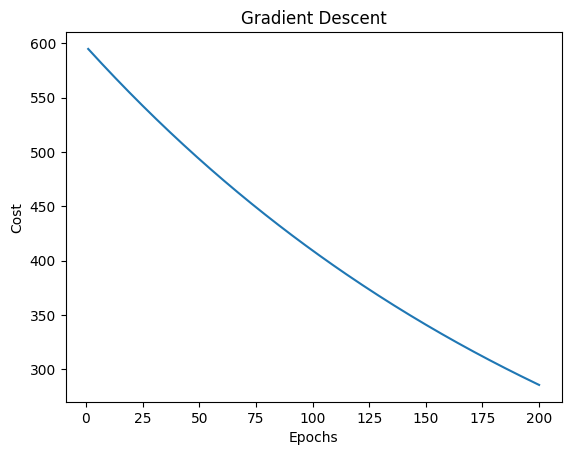

In [375]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = GradientDescent(eta=1e-3,max_iter=200, random_state=42)


# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



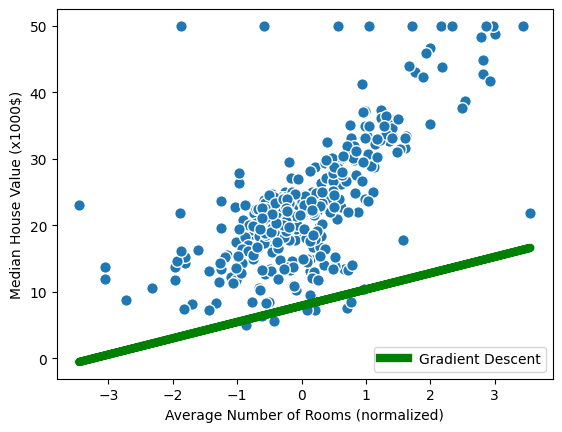

In [376]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [377]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = SGDRegressor(eta0=1e-3, max_iter=200, random_state=42, learning_rate='constant')

# Train SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)

SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=200,
             random_state=42)

Visualize the prediction of Stochastic Gradient Descent model on Training Data


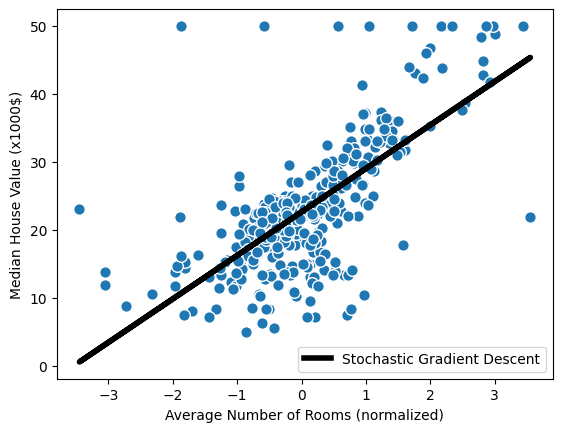

In [378]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [379]:
# Initalize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

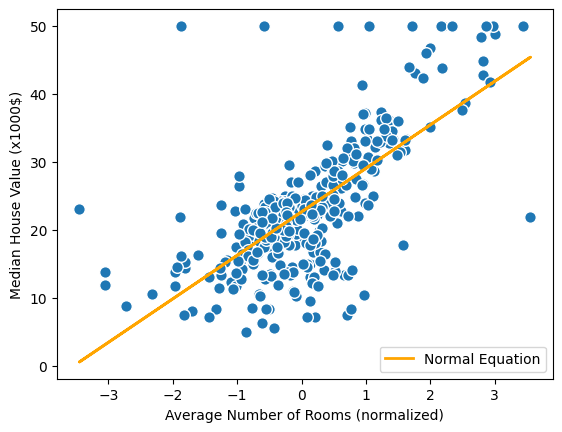

In [380]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

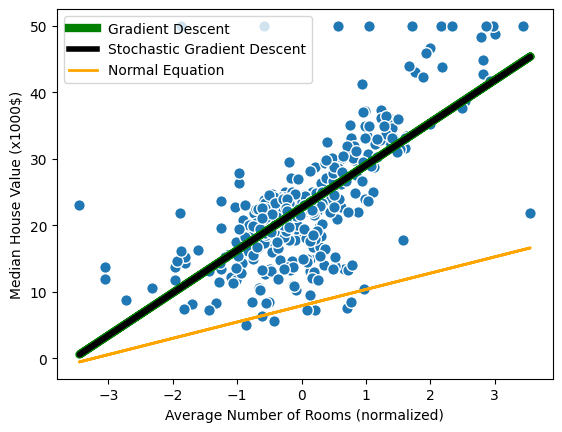

In [381]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [382]:
w_GD = reg_GD.w
w_GD

array([[7.90101492],
       [2.44965698]])

In [383]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([22.62083926,  6.39567675])

In [384]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.64163118,  6.40020122])

In [385]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [386]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [387]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [388]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 13.84043
MAE of SGD: 4.312817
MAE of NE: 4.314224


In [389]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 244.581164
MSE of SGD: 40.336472
MSE of NE: 40.35145


In [390]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: -2.282392
R2 of SGD: 0.458666
R2 of NE: 0.458465


# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [391]:
# Re-load dataset
housing_dataset = pd.read_csv('/content/drive/MyDrive/boston_housing.csv')

* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [392]:
X = housing_dataset.drop('MEDV', axis=1).values
y = housing_dataset['MEDV'].values

In [393]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

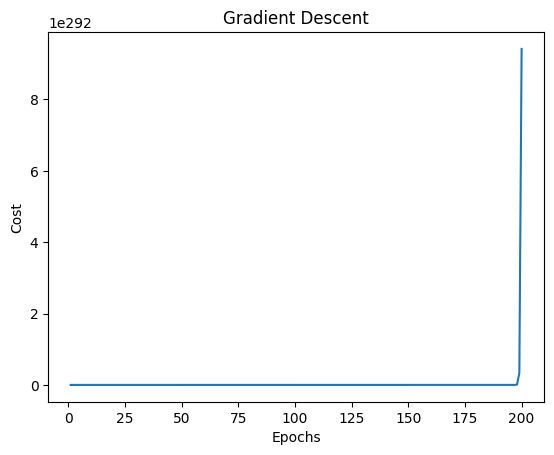

In [394]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-5, max_iter=200)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [395]:
# Initialize the SGD model
reg_SGD = SGDRegressor()

# Train model
reg_SGD.fit(X_train, y_train)

SGDRegressor()

### Normal Equation

In [396]:
# Add the '1' column to data


In [397]:
# Intialize the NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

### Algorithms Comparisons

In [398]:
w_GD = reg_GD.w
w_GD

array([[-9.54673416e+140],
       [-4.16594716e+141],
       [-9.64835031e+141],
       [-1.15184300e+142],
       [-7.27053617e+139],
       [-5.45766884e+140],
       [-5.99895697e+141],
       [-6.81132790e+142],
       [-3.39300157e+141],
       [-1.04479679e+142],
       [-4.19633395e+143],
       [-1.76494956e+142],
       [-3.43624839e+143],
       [-1.24936107e+142]])

In [399]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([-2.08310715e+10, -2.28284885e+11, -2.21302833e+11,  8.91021777e+10,
       -1.02406865e+11, -2.28268126e+09, -1.51504953e+11, -3.71194977e+11,
       -1.68784189e+11,  1.69814172e+10,  1.24825447e+11, -3.04788598e+11,
        2.63961252e+11,  1.69698620e+11])

In [400]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([ 3.16310840e+01, -1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
        3.11983512e+00, -1.54170609e+01,  4.05719923e+00, -1.08208352e-02,
       -1.38599824e+00,  2.42727340e-01, -8.70223437e-03, -9.10685208e-01,
        1.17941159e-02, -5.47113313e-01])

In [401]:
y_pred_GD = reg_GD.predict(X_test)

In [402]:
y_pred_SGD = reg_SGD.predict(X_test)

In [403]:
y_pred_NE = reg_NE.predict(X_test)

In [404]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 2.981571818323059e+146
MAE of SGD: 110966526366899.19
MAE of NE: 3.16271


In [405]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 9.295316750750665e+292
MSE of SGD: 1.2935980733800719e+28
MSE of NE: 21.517444


In [406]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: -1.247474243273711e+291
R2 of SGD: -1.736068087792506e+26
R2 of NE: 0.711226


## Experiment with Standardized Data

In [407]:
# Re-load dataset
housing_dataset = pd.read_csv('/content/drive/MyDrive/boston_housing.csv')

In [408]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [409]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [410]:
X_new = scaler.fit_transform(housing_dataset.drop('MEDV', axis=1))
y = housing_dataset['MEDV'].values

In [411]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

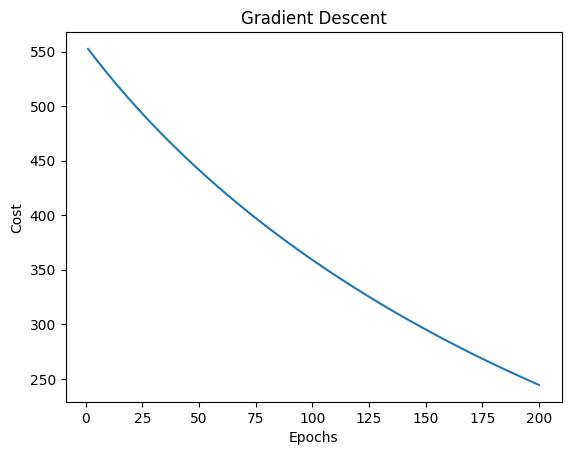

In [412]:
# Initalize the GD model
reg_GD = GradientDescent(eta=1e-3, random_state=42,max_iter=200)

# Train model on normalized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [413]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = SGDRegressor(eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')

# Train model
reg_SGD.fit(X_train_norm, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=200,
             random_state=42)

### Normal Equation (sklearn)

In [414]:
# Initialize NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

### Algorithms Comparisons

In [415]:
w_GD = reg_GD.w
w_GD

array([[ 7.80883276],
       [-0.66449944],
       [ 0.89484538],
       [ 0.92871896],
       [ 0.36422395],
       [-0.54912565],
       [ 2.8325605 ],
       [ 0.3925873 ],
       [-0.48220019],
       [ 0.16153651],
       [-0.96506556],
       [-1.62117385],
       [ 0.86911604],
       [-3.05504432]])

In [416]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([22.47521194, -0.94717769,  0.40179183, -0.05520802,  0.86619346,
       -1.10632008,  3.09329047, -0.39409591, -2.22833111,  0.87743613,
       -0.31647518, -1.86700159,  1.0987754 , -3.78831503])

In [417]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.50945471, -1.14691411,  0.83432605,  0.33940694,  0.79163612,
       -1.784727  ,  2.84783949, -0.30429306, -2.91562521,  2.11140045,
       -1.46519951, -1.9696347 ,  1.07567771, -3.90310727])

In [418]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [419]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [420]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [421]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 14.641515
MAE of SGD: 3.207579
MAE of NE: 3.16271


In [422]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 238.902278
MSE of SGD: 22.927133
MSE of NE: 21.517444


In [423]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: -2.206178
R2 of SGD: 0.692307
R2 of NE: 0.711226


# Explain what $R^2$ coefficient is.

| Thuật toán                            | MAE (thấp hơn tốt hơn)       | MSE (thấp hơn tốt hơn) | R² (cao hơn tốt hơn)        | Nhận xét                                                          |
| ------------------------------------- | ---------------------------- | ---------------------- | --------------------------- | ----------------------------------------------------------------- |
| **NE (Normal Equation)**              | Thấp nhất hoặc gần thấp nhất | Thấp nhất              | Cao nhất (\~0.71)           | Ổn định, hội tụ tốt, dự đoán chính xác nhất trong ba phương pháp. |
| **SGD (Stochastic Gradient Descent)** | Trung bình                   | Trung bình             | Dao động mạnh (0.26 → 0.69) | Phụ thuộc tham số học, có thể đạt kết quả gần NE nếu tối ưu tốt.  |
| **GD (Gradient Descent)**             | Cao nhất                     | Cao nhất               | Thường âm hoặc rất thấp     | Nhiều lần không hội tụ, hiệu năng kém nhất.                       |


R2 là hệ số xác định, dánh giá mức độ giải thích biến động của biến mục tiêu bởi mô hình.
Phạm vi giao động từ 0 đến 1.
Mô hình hoàn hảo khi R2 = 1 và mô hình không tốt hơn việc dự đoán bằng giá trị trung bình khi R2 xấp xỉ bằng 0